# Approximation with Legendre polynomials.

In the previous exercises we use Fourier polynomials, which are *trigonometric* polynomials
$$T_n(x)=\frac{a_0}{2}+b_1\sin{x}+a_1\cos{x}+b_2\sin{2x}+a_2\cos{2x}+\ldots+b_n\sin{nx}+a_n\cos{nx},$$
to approximate other functions.

In many situation we would rather approximate with a "normal" polynomial
$$p_n(x)=c_0+c_1x+c_2x^2+\ldots+c_nx^n.$$

We can apply the same idea that lead us to Fourier series, using projections on a subspace:

Consider the space $C([-1,1])$ (the space of continuous functions on $[-1,1]$) equipped with the inner product
$$\langle f,g\rangle =\int_{-1}^1 f(x)g(x)\,dx,\quad f,g\in C([-1,1]),$$
and consider the subspace
$$\mathcal{P}_n=\{p(x)=a_0+a_1x+\ldots+a_nx^n:a_0,a_1,\ldots,a_n\in\mathbb{R}\}.$$

In other words, $\mathcal{P}_n$ is the subspace of $C([-1,1])$ consisting of all polynomials of degree $\leq n$.

To find the polynomial $p\in\mathcal{P}_n$ that best approximates some given function $f\in C([a,b])$ (in the sense that $p$ minimizes the distance $\|p-f\|$ among all $p\in\mathcal{P}_n$), we should of course choose the projection
$$p=\mathrm{proj}_{\mathcal{P}_n}\,f.$$

To calculate the projection, we can use the projection formula
$$\mathrm{proj}_{\mathcal{P}_n}f=\frac{\langle f,q_0\rangle}{\|q_0\|^2}q_0+\frac{\langle f,q_1\rangle}{\|q_1\|^2}q_1+\ldots+\frac{\langle f,q_n\rangle}{\|q_n\|^2}q_n,$$
provided that
$$\{q_0,q_1,\ldots,q_n\}$$
is an **orthogonal** basis for $\mathcal{P}_n$.

We have a simple basis for $\mathcal{P}_n$:
$$\mathcal{B}=\{1,x,x^2,\ldots,x^n\},$$
but unfortunately, this is not an *orthogonal* basis. For example
$$\langle 1,x^2\rangle = \int_{-1}^1 1\cdot x^2=\frac{2}{3}\neq 0,$$
so $1$ and $x^2$ are not orthogonal.

We can however obtain an orthogonal basis from the basis above by applying the Gram-Schmidt process. This involves quite a bit of work, but fortunately this has been done before. The orthogonal basis we get from the Gram-Schmidt process are called *Legendre polynomials* and the first few of them look like this:

$$q_0(x)=1$$
$$q_1(x)=x$$
$$q_2(x)=\frac{1}{2}(3x^2-1)$$
$$q_3(x)=\frac{1}{2}(5x^3-3x)$$
$$\vdots$$

Let's just check that a few of them are indeed orthogonal:
$$\langle q_0,q_1\rangle = \int_{-1}^1 1\cdot x\,dx=0\quad (\text{odd integrand}).$$
$$\langle q_0,q_2\rangle = \int_{-1}^1 1\cdot \frac{1}{2}(3x^2-1)\,dx=\frac{1}{2}\left[x^3-x\right]_{-1}^1=\frac{1}{2}((1-1)-(-1-(-1)))=0.$$
$$\langle q_1,q_2\rangle = \int_{-1}^1 x\cdot \frac{1}{2}(3x^2-1)\,dx=\frac{1}{2}\int_{-1}^1 (3x^3-x)\,dx=0\quad (\text{odd integrand}).$$
$$\text{etc.}$$
$$\vdots$$

The Legendre polynomials are also available in Python, in the `scipy.special` library. The function for evaluating Legendre polynomials is called `eval_legendre(n,x)`, where `n` is the degree of the polynomial and `x` is the point we're evaluating at. Let's import it (and the other stuff we'll need).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import eval_legendre

First, let's plot the first four Legendre polynomials listed above.

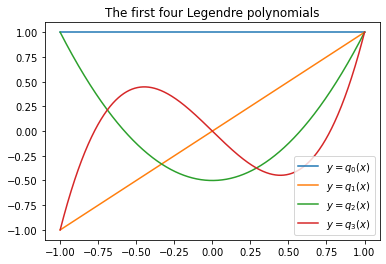

In [2]:
# You don't have to edit this cell. Just run it.

x = np.linspace(-1,1,1000)
y0 = eval_legendre(0,x)
y1 = eval_legendre(1,x)
y2 = eval_legendre(2,x)
y3 = eval_legendre(3,x)

plt.plot(x,y0,label=r"$y=q_0(x)$")
plt.plot(x,y1,label=r"$y=q_1(x)$")
plt.plot(x,y2,label=r"$y=q_2(x)$")
plt.plot(x,y3,label=r"$y=q_3(x)$")
plt.legend()
plt.title("The first four Legendre polynomials")
plt.show()

## Exercise

Create a function `Lapprox(f,n,x)` that evaluates the projection
$$\mathrm{proj}_{\mathcal{P}_n}f=\frac{\langle f,q_0\rangle}{\|q_0\|^2}q_0+\frac{\langle f,q_1\rangle}{\|q_1\|^2}q_1+\ldots+\frac{\langle f,q_n\rangle}{\|q_n\|^2}q_n.$$

This is very similar to the `Fpoly` function from your first exercise, with the difference that instead of using trigonometric functions on $[-\pi,\pi]$, we are now using Legendre polynomials on $[-1,1]$. 

Another slight difference to take note of is that although the Legendre polynomials listed above are *orthogonal* they are not *orthonormal*, so you must remember to divide each term (according to the formula above) with
$$\|q_k\|^2=\langle q_k,q_k\rangle = \int_{-1}^1 (q_k(t))^2\,dt.$$

If you want you can copy and paste your `Fpoly` function and edit the necessary details, or you can just directly edit the cell below.

In [36]:
def Fpoly(f,n,x) :
    # Supply the missing code such that the function follows the specifications.
    T = ((1/np.pi) * quad(lambda t : f(t)*np.cos(0), -np.pi, np.pi)[0])/2   # Let T be the first term a0/2 (use quad to calculate the integral).
    for k in range(1,n+1) :
        ak = quad(lambda t : f(t)*np.cos(k*t),-np.pi,np.pi)[0]/np.pi # Coefficient a_k
        bk = quad(lambda t : f(t)*np.cos(k*t),-np.pi,np.pi)[0]/np.pi # Coefficient b_k
        T = T + ak*np.cos(k*x) + bk*np.sin(k*x)
    return T

def Lapprox(f,n,x) :
    s = 0
    for k in range(0,n+1) :
        c =  quad(lambda t: eval_legendre(k, t) * f(t), -1, 1)[0] / quad(lambda t: eval_legendre(k, t)**2, -1, 1)[0]      # Calculate the coefficient in front of q_k here.
        s = s + c * eval_legendre(k, x)   # Fill in the rest
    return s        

## Testing your code.

Let's test your code by plotting some approximations of the function $f:[-1,1]\to\mathbb{R}$ defined and plotted below:

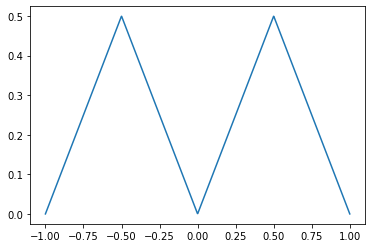

In [37]:
# Don't edit this cell. Just run it.

def f(x) :
    return abs(x-np.round(x))

x = np.linspace(-1,1,1000)
y = f(x)
plt.plot(x,y)
plt.show()

So, let's calculate some approxiations using your function. How about the 4th, 9th and 30th degree:

In [38]:
# Don't edit this cell. Just run it.

x = np.linspace(-1,1,1000)
y = f(x)
y4 = Lapprox(f,4,x)
y9 = Lapprox(f,9,x)
y30 = Lapprox(f,30,x)

And let's plot...


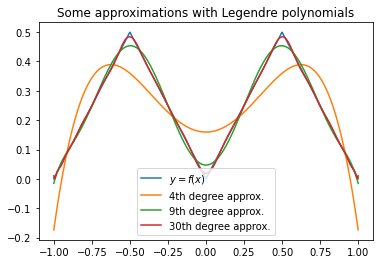

In [39]:
# Don't edit this cell. Just run it.

%matplotlib inline
plt.plot(x,y,label=r"$y=f(x)$")
plt.plot(x,y4,label="4th degree approx.")
plt.plot(x,y9,label="9th degree approx.")
plt.plot(x,y30,label="30th degree approx.")
plt.legend()
plt.title("Some approximations with Legendre polynomials")
plt.savefig('foo.png')
plt.show()

## To submit in LAMS

- Your code for `Lapprox`
- The plot above.